This is for testing some of the stuff in the ML course

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("testCSV.csv") # a "data frame"
print("Type of df:", type(df))
print("Should be 10: ", len(df))
df.head(10)

Type of df: <class 'pandas.core.frame.DataFrame'>
Should be 10:  10


,X,Y
0,2,6
1,6,6
2,4,5
3,5,3
4,4,1
5,7,4
6,1,2
7,4,7
8,8,1
9,2,6


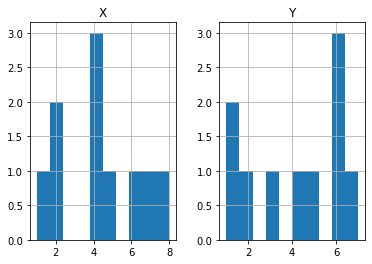

In [3]:
df.hist()
plt.show()

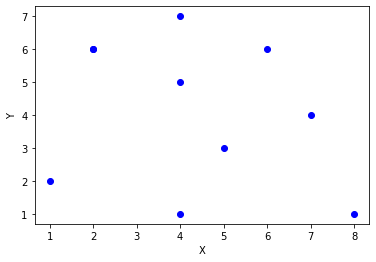

In [4]:
plt.scatter(df.X, df.Y,  color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [5]:
for i in range(5):
    print(np.random.rand(3)) # use of rand <- array length is input

[0.91320926 0.84603665 0.72070962]
[0.64971959 0.36379171 0.27542962]
[0.47299998 0.29847829 0.9589052 ]
[0.14257391 0.35730141 0.9347478 ]
[0.11081325 0.61603517 0.52263353]


In [6]:
list_object = [3,9,2,7]
numpy_ndarray = np.array(list_object)
print("Type of list_object:", type(list_object))
print("Type of numpy_ndarray:", type(numpy_ndarray))
print("Type of the np.random.rand(3):", type(np.random.rand(3)) )
print("Values in numpy_ndarray:", numpy_ndarray)
print("Result of numpy_ndarray < 5:", numpy_ndarray < 5)

Type of list_object: <class 'list'>
Type of numpy_ndarray: <class 'numpy.ndarray'>
Type of the np.random.rand(3): <class 'numpy.ndarray'>
Values in numpy_ndarray: [3 9 2 7]
Result of numpy_ndarray < 5: [ True False  True False]


In [7]:
fixed_msk = np.array([True,True,False,True,False,False,False,False,False,False])
opposite = ~fixed_msk
print("Opposite: ", opposite)
short_df = df[fixed_msk] 
print("Type of short_df (notice also DataFrame): ", type(short_df))
short_df.head()

Opposite:  [False False  True False  True  True  True  True  True  True]
Type of short_df (notice also DataFrame):  <class 'pandas.core.frame.DataFrame'>


,X,Y
0,2,6
1,6,6
3,5,3


In [8]:
msk = np.random.rand(len(df)) < 0.7
train = df[msk]
test = df[~msk]
print("Can see mask choosing train and test")
print(msk)
print(train)
print()
print(test)

Can see mask choosing train and test
[ True  True  True False  True  True  True False False False]
   X  Y
0  2  6
1  6  6
2  4  5
4  4  1
5  7  4
6  1  2

   X  Y
3  5  3
7  4  7
8  8  1
9  2  6


In [9]:
train[['X']] # select appropriate data - note: need double bracket

,X
0,2
1,6
2,4
4,4
5,7
6,1


In [10]:
# these lines just convert data frames to numpy arrays for use in sklearn regression.
# (even though it seems that at times sklearn can handle data frames)

train_x = np.asanyarray(train[['X']]) 
test_x = np.asanyarray(test[['X']]) 
print("Starts as:", type(train[['X']]) )
print("Converted to:", type(train_x) )

train_y = np.asanyarray(train[['Y']])
test_y = np.asanyarray(test[['Y']])

print("Dimension of train_x", train_x.shape)
print("Dimension of test_x", test_x.shape)


# Can do operations to numpy array that apply to all numbers in array
print(train_x)
print()
print(2*train_x + 1)

Starts as: <class 'pandas.core.frame.DataFrame'>
Converted to: <class 'numpy.ndarray'>
Dimension of train_x (6, 1)
Dimension of test_x (4, 1)
[[2]
 [6]
 [4]
 [4]
 [7]
 [1]]

[[ 5]
 [13]
 [ 9]
 [ 9]
 [15]
 [ 3]]


In [11]:
# The regression step
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
# After the last line the model is set and we can extract info.

coefs = regr.coef_
intercept = regr.intercept_
print ('Coefficients: ', coefs, "of type:", type(coefs))
print ('Intercept: ', intercept, "of type:", type(intercept))

coef_as_num = coefs[0][0]
intercept_as_num = intercept[0]
print ('Coefficient as number: ', coef_as_num, "of type:", type(coef_as_num))
print ('Intercept as number: ', intercept_as_num, "of type:", type(intercept_as_num))


Coefficients:  [[0.23076923]] of type: <class 'numpy.ndarray'>
Intercept:  [3.07692308] of type: <class 'numpy.ndarray'>
Coefficient as number:  0.23076923076923075 of type: <class 'numpy.float64'>
Intercept as number:  3.076923076923077 of type: <class 'numpy.float64'>


Text(0, 0.5, 'Y')

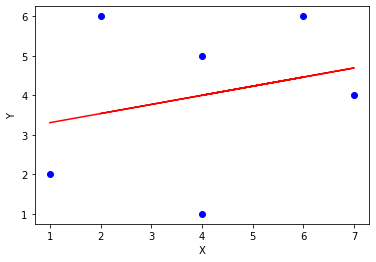

In [12]:
plt.scatter(train.X, train.Y,  color='blue')
plt.plot(train_x, coef_as_num*train_x + intercept_as_num, '-r')
plt.xlabel("X")
plt.ylabel("Y")

Text(0, 0.5, 'Y')

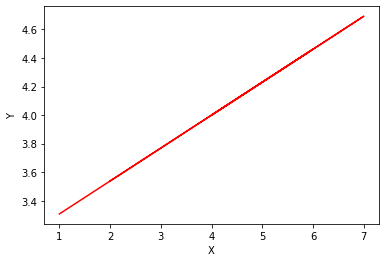

In [13]:
# To plot more involved function could make separate function
def yValsOfLine(x_values, slope, yIntercept):
    return slope*x_values + yIntercept

plt.plot(train_x, yValsOfLine(train_x, coef_as_num, intercept_as_num), '-r')
plt.xlabel("X")
plt.ylabel("Y")

In [14]:
# Now that we have the model, stored in regr object we can "predict",
# that is from input explanatory variable(s) get response variables.
# Do this for 1) Just using the model.
#             2) Evaluating model on test values.

# Notice that predict expects 2-dimensional array
print("Model predicts that on input X = 10, Y =", regr.predict([[10]]))
print("This should be the same:", coef_as_num*10 + intercept_as_num)

# Reason for 2-D array? ...
'''
I suppose because typically taken from data frames, which give 2D no matter
the number of explanatory variables.
'''

Model predicts that on input X = 10, Y = [[5.38461538]]
This should be the same: 5.384615384615385


'\nI suppose because typically taken from data frames, which give 2D no matter\nthe number of explanatory variables.\n'

Text(0, 0.5, 'Y')

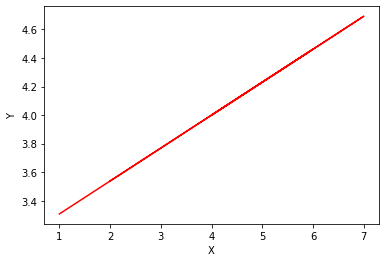

In [15]:
# Use the predict as another way to plot the model (seems more natural?)
plt.plot(train_x, regr.predict(train_x), '-r')
plt.xlabel("X")
plt.ylabel("Y")

In [16]:
# Finally, use predict to evaluate the model

y_hat_values = regr.predict(test_x)

print("Mean absolute error:", np.mean(np.absolute(test_y - y_hat_values)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y - y_hat_values) ** 2))


Mean absolute error: 2.6538461538461537
Residual sum of squares (MSE): 7.99


In [17]:
# Other metrics
from sklearn.metrics import r2_score
print("R2-score:", r2_score(test_y , y_hat_values) )

R2-score: -0.40503283698549986
